<a href="https://colab.research.google.com/github/rayen3060/Keypad/blob/master/BruitImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2f
from matplotlib import pyplot as plt
from google.colab import files

ModuleNotFoundError: No module named 'cv2f'

Saving lion.jpg to lion (6).jpg


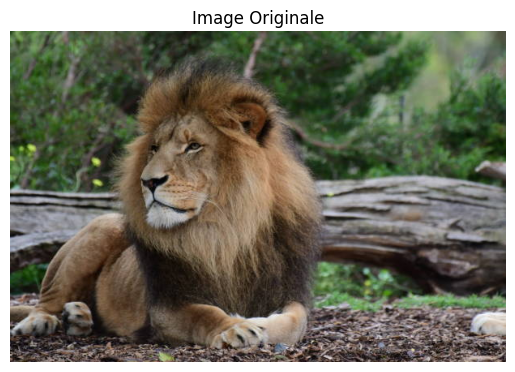

In [ ]:
# Charger l'image
uploaded = files.upload()  # Téléchargez votre image ici
image_path = list(uploaded.keys())[0]
image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Afficher l'image originale
plt.imshow(image_rgb)
plt.title("Image Originale")
plt.axis('off')
plt.show()

L'image originale est affichée avec ses couleurs et détails intacts. Les pixels sont bien définis, sans perturbation ou artefacts.

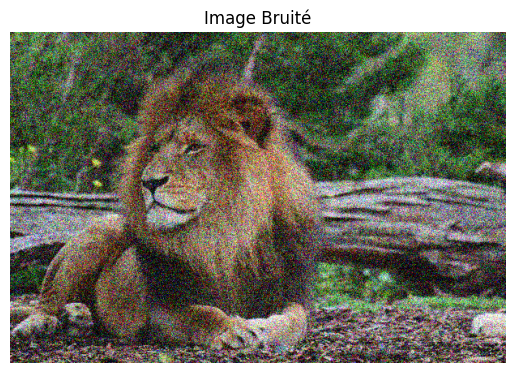

In [ ]:
def Bruit_Gaussien(image, mean, sigma):
  #Application du bruit gaussien
  gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)
  noisy_image = image.astype(np.float32) + gaussian_noise
  # Les valeurs doivent rester dans l'intervalle  [0, 255]
  noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
  return noisy_image

noisy_image=Bruit_Gaussien(image_rgb, mean=0, sigma=50)
plt.imshow(noisy_image)
plt.title("Image Bruité")
plt.axis('off')
plt.show()

En observant l'image bruitée, on observe des petits points lumineux et sombres un peu partout. Ces points rendent l'image moins nette et un peu floue.

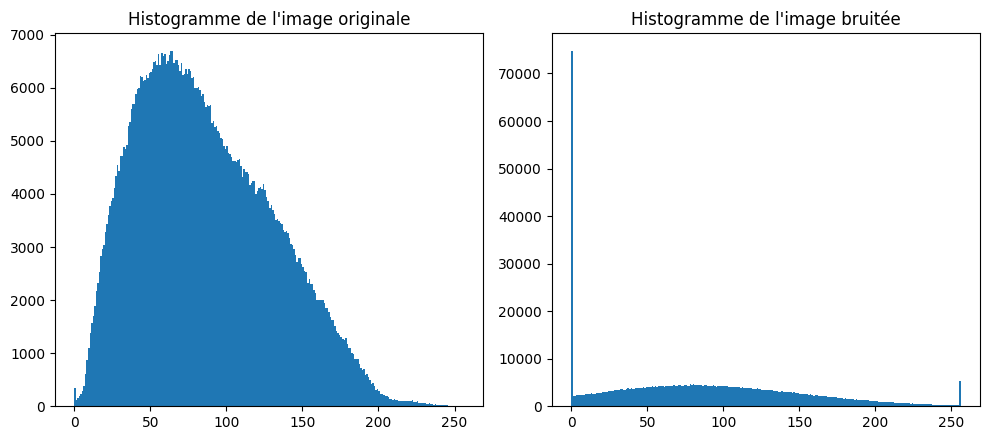

In [ ]:
# Afficher les histogrammes
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

# Histogramme de l'image originale
axes[0].hist(image_rgb.ravel(), bins=256, range=[0, 256])
axes[0].set_title("Histogramme de l'image originale")

# Histogramme de l'image bruitée
axes[1].hist(noisy_image.ravel(), bins=256, range=[0, 256])
axes[1].set_title("Histogramme de l'image bruitée")

plt.tight_layout()
plt.show()


Histogramme de l'image originale :

*   Il représente la distribution des intensités des pixels dans l'image.
*   Les pics dans l'histogramme indiquent les plages d'intensité les plus fréquentes pour les canaux R, G et B.
*   Un histogramme bien défini suggère que l'image a un bon contraste.


Histogramme de l'image bruitée :
* le bruit Gaussien rend la distribution des pixels plus dispersée, affectant le contraste et la clarté de l'image.
*  Les valeurs des pixels sont réparties sur une gamme plus large à cause du bruit ajouté.
*   Les pics présents dans l'image originale sont moins marqués ou lissés, car le bruit ajoute des variations autour des valeurs d'intensité d'origine.

Cela reflète une perte de structure dans les données d'intensité des pixels.

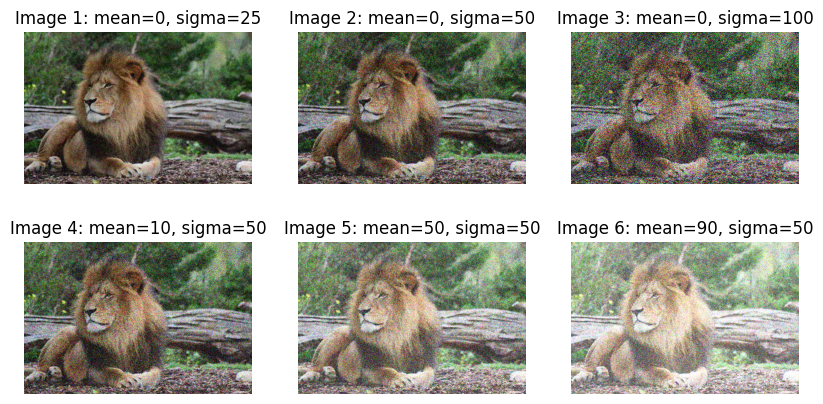

In [ ]:

noisy_images = []

# Application du bruit Gaussien avec différents paramètres (moyenne et écart-type)
noisy_images.append(Bruit_Gaussien(image_rgb, mean=0, sigma=25))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=0, sigma=50))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=0, sigma=100))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=10, sigma=50))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=50, sigma=50))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=90, sigma=50))

# Affichage des images bruitées avec différents paramètres
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(noisy_images[i])
    ax.set_title(f"Image {i+1}: mean={0 if i < 3 else 40*i-110}, sigma={25 if i==0 else 100 if i==2 else 50}")
    ax.axis("off")

plt.show()

Les images bruitées montrent des variations aléatoires introduites par le bruit Gaussien. Ces variations :

*   Peuvent rendre certains détails flous ou masqués.
*   Donnent un aspect granuleux à l'image.

L'ajout de bruit Gaussien à une image entraîne une perte de clarté visuelle. En fonction des valeurs de la moyenne (mean) et de l'écart-type (sigma), l'effet du bruit varie : un bruit léger (sigma faible) rend l'image légèrement floue, tandis qu'un bruit plus intense (sigma élevé) transforme l'image en une sorte de grésillement, rendant difficile la reconnaissance des détails. À mesure que la moyenne augmente, le bruit se répartit autour de valeurs plus grandes, ce qui peut accentuer le contraste des imperfections. En résumé, un bruit Gaussien plus fort dégrade visuellement l'image, perturbant sa qualité et rendant l'analyse plus complexe.

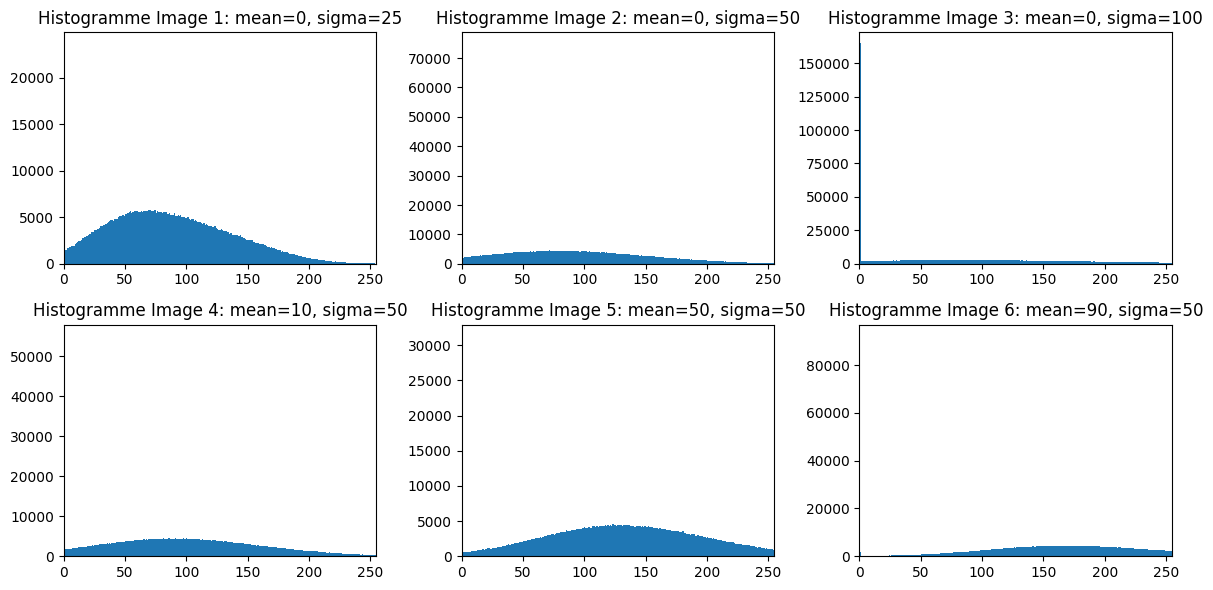

In [ ]:
# Affichage les histogrammes pour chaque image
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    # Afficher l'histogramme de l'image
    ax.hist(noisy_images[i].ravel(), bins=256, range=[0, 256])
    ax.set_title(f"Histogramme Image {i+1}: mean={0 if i < 3 else 40*i-110}, sigma={25 if i==0 else 100 if i==2 else 50}")
    ax.set_xlim(0, 255)

plt.tight_layout()
plt.show()

Les histogrammes des images bruitées montrent comment les variations des paramètres de bruit (moyenne et sigma) influencent la distribution des intensités. Avec une moyenne de 0 et un sigma croissant (25 à 100), la dispersion des pixels augmente, rendant l'image plus bruitée. Lorsque la moyenne est augmentée (10 ou 90), l'histogramme se décale vers des intensités plus élevées, reflétant un éclaircissement global. Ces résultats illustrent comment les paramètres du bruit Gaussien affectent à la fois la répartition des intensités et la qualité visuelle des images.

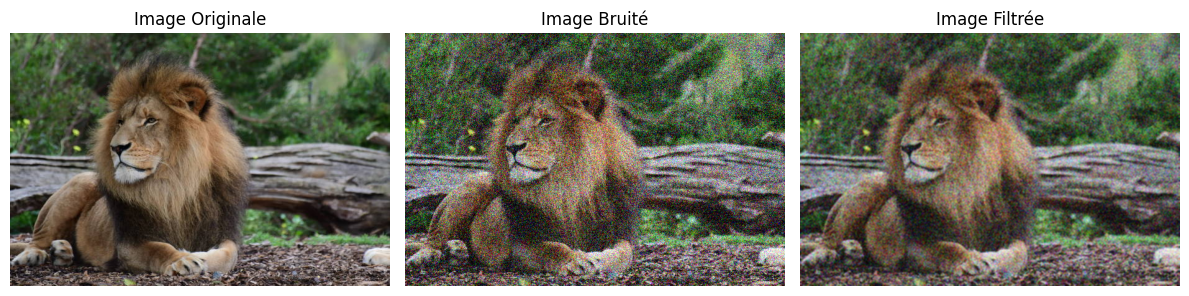

In [ ]:
sigma=50
taille_noyau=(3,3)
image_filtrée = cv2.GaussianBlur(noisy_image, taille_noyau, sigma)

# Créer un subplot avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Afficher l'image originale
axes[0].imshow(image_rgb)
axes[0].set_title("Image Originale")
axes[0].axis('off')

# Afficher l'image bruitée
axes[1].imshow(noisy_image)
axes[1].set_title("Image Bruité")
axes[1].axis('off')

# Afficher l'image filtrée
axes[2].imshow(image_filtrée)
axes[2].set_title("Image Filtrée")
axes[2].axis('off')

# Ajuster les espacements
plt.tight_layout()

# Afficher le graphique
plt.show()




L'image originale est nette et claire, sans aucune perturbation. L'ajout du bruit Gaussien avec un sigma=50 a introduit un effet granuleux sur l'image, créant des variations aléatoires d'intensité des pixels, ce qui rend l'image floue et perturbée. En appliquant un filtre Gaussien avec un noyau de taille (3, 3) à l'image bruitée, on remarque un lissage qui réduit considérablement l'effet du bruit, mais cela entraîne également une perte de détails fins. Le filtre Gaussien a donc permis d'améliorer la lisibilité de l'image en supprimant une partie du bruit, mais au prix d'une certaine douceur. Ce processus montre comment un filtrage peut atténuer le bruit tout en modifiant les contours et détails de l'image.

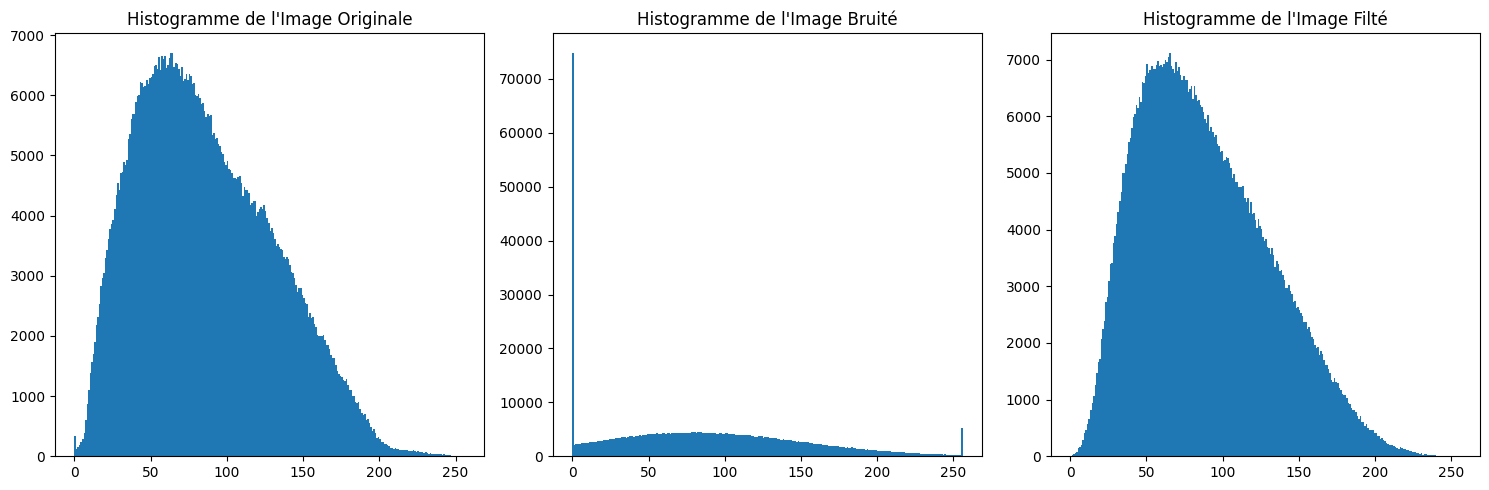

In [ ]:
# Affichage les histogrammes pour chaque image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(image_rgb.ravel(), bins=256, range=[0, 256])
axes[0].set_title("Histogramme de l'Image Originale")
axes[1].hist(noisy_image.ravel(), bins=256, range=[0, 256])
axes[1].set_title("Histogramme de l'Image Bruité")
axes[2].hist(image_filtrée.ravel(), bins=256, range=[0, 256])
axes[2].set_title("Histogramme de l'Image Filté")
plt.tight_layout()
plt.show()

L'histogramme de l'image originale montre une répartition naturelle et équilibrée des intensités, reflétant une image claire et bien définie. En comparaison, l'histogramme de l'image bruitée est plus dispersé, avec une distribution étendue des pixels due au bruit Gaussien, créant un effet granuleux visible. Après le filtrage, l'histogramme de l'image filtrée devient plus concentré, montrant une réduction du bruit, mais avec une légère perte de détails par rapport à l'image originale.

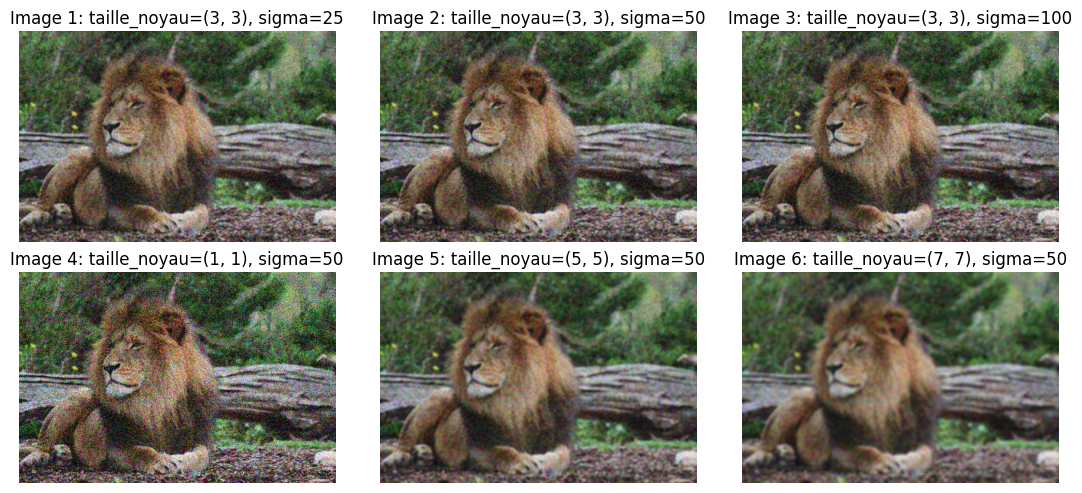

In [ ]:
images_filtrées = []

# Application des filtres gaussiens avec différents paramètres
images_filtrées.append(cv2.GaussianBlur(noisy_image, (3, 3), 25))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (3, 3), 50))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (3, 3), 100))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (1, 1), 50))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (5, 5), 50))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (7, 7), 50))

# Créer un subplot avec 2 lignes et 3 colonnes
fig, axes = plt.subplots(2, 3, figsize=(11, 5))

# Afficher chaque image filtrée dans les sous-graphiques
for i, ax in enumerate(axes.flat):
    ax.imshow(images_filtrées[i])
    ax.set_title(f"Image {i+1}: taille_noyau={(3,3) if i < 3 else (1,1) if i == 3 else (5,5) if i==4 else (7,7)}, sigma={ 25 if i==0 else 100 if i==2 else 50}")
    ax.axis("off")

plt.tight_layout()
plt.show()


L'application de différents filtres Gaussiens sur l'image bruitée montre des variations dans le lissage en fonction de la taille du noyau et du sigma. Les images avec un petit sigma et un noyau de taille (3,3) présentent un lissage modéré, préservant certains détails. En augmentant le sigma à 100, le lissage devient plus prononcé, effaçant davantage de bruit mais réduisant les détails fins. Les tailles de noyau comme (1,1) offrent peu de lissage, tandis que des noyaux plus grands, comme (5,5) ou (7,7), produisent un effet de lissage global plus marqué. Cette comparaison illustre comment ces paramètres influencent le compromis entre réduction du bruit et préservation des détails.

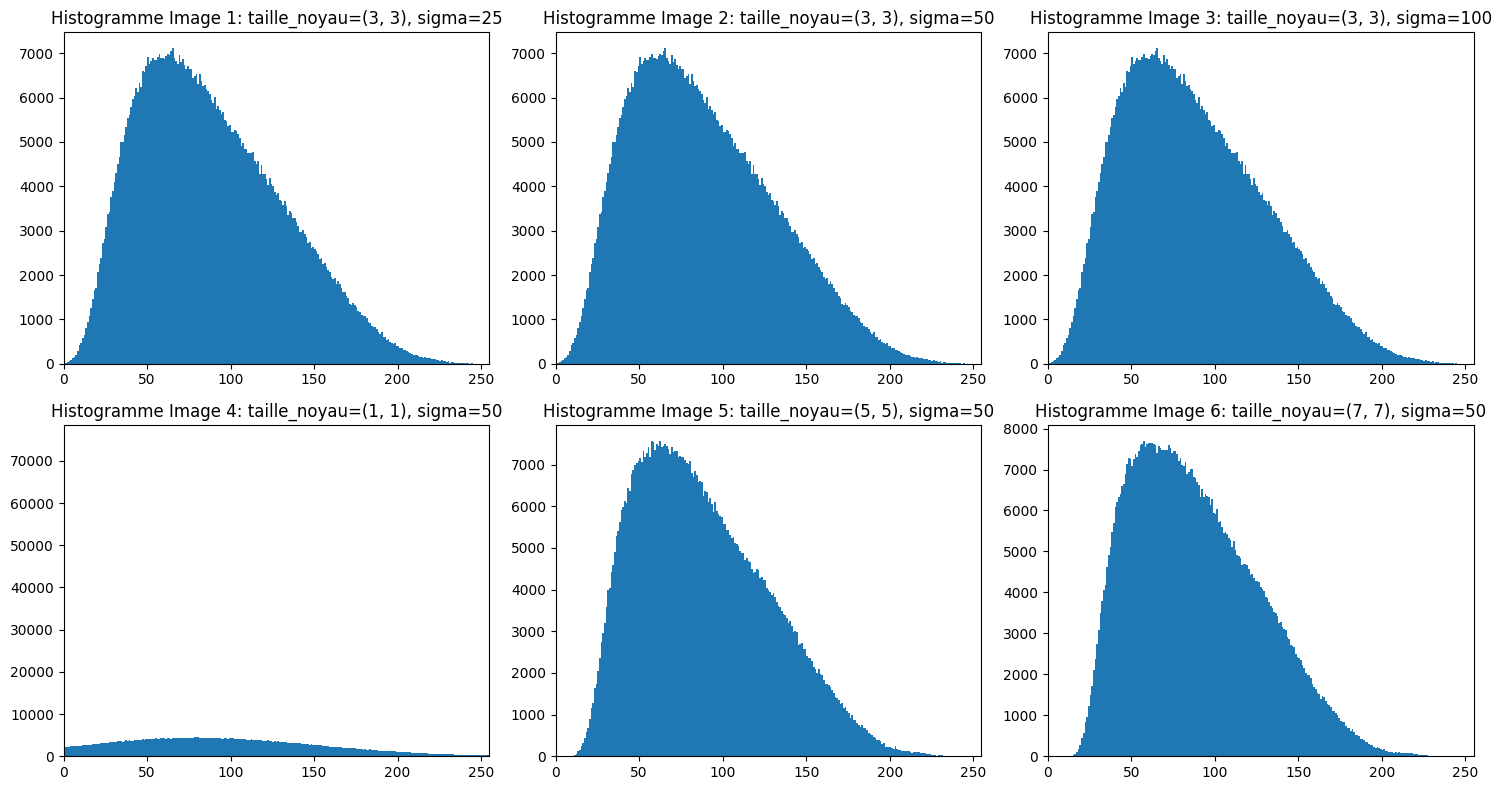

In [ ]:
# Affichage les histogrammes pour chaque image
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, ax in enumerate(axes.flat):
    # Afficher l'histogramme de l'image
    ax.hist(images_filtrées[i].ravel(), bins=256, range=[0, 256])
    ax.set_title(f"Histogramme Image {i+1}: taille_noyau={(3,3) if i < 3 else (1,1) if i == 3 else (5,5) if i==4 else (7,7)}, sigma={ 25 if i==0 else 100 if i==2 else 50}")
    ax.set_xlim(0, 255)

plt.tight_layout()
plt.show()

Les histogrammes des images filtrées montrent l'évolution de la répartition des intensités en fonction des paramètres de filtrage. Avec un noyau de taille (3,3) et un sigma croissant (25 à 100), la répartition devient plus homogène, indiquant un lissage progressif. Un petit noyau (1,1) et un sigma de 50 préservent des variations d'intensité, avec moins de réduction de bruit. Les noyaux plus grands, (5,5) et (7,7), montrent une répartition encore plus uniforme, marquant une forte atténuation du bruit. Ces variations d'histogrammes soulignent comment les paramètres influencent le compromis entre le bruit résiduel et le lissage global.